In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [0]:
import numpy as np 
import pandas as pd 
Path = "/content/drive/My Drive/Practicum/"
Fraud_data = pd.read_csv(Path + "Fraud_Data.csv")

In [0]:
Fraud_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [0]:
Fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [0]:
Fraud_data.shape

(6362620, 11)

In [0]:
#View transaction types
fraud = Fraud_data[Fraud_data["isFraud"] == 1]
non_fraud = Fraud_data[Fraud_data["isFraud"] == 0]

print("Fraudulent transactions: \n", fraud.type.value_counts())
print("\n")
print("Non-Fraudulent transactions: \n",non_fraud.type.value_counts())

Fraudulent transactions: 
 CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


Non-Fraudulent transactions: 
 CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64


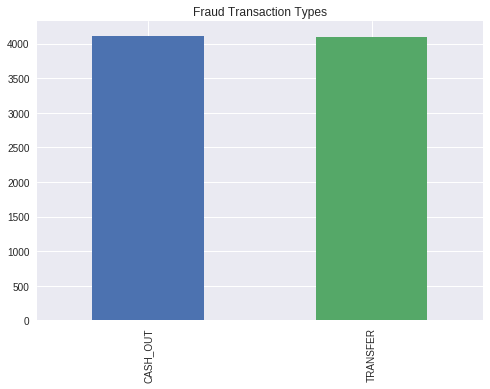

In [0]:
fraud.type.value_counts().plot(kind = 'bar', title = 'Fraud Transaction Types')

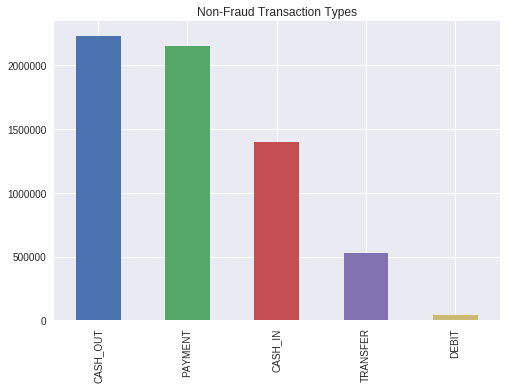

In [0]:
non_fraud.type.value_counts().plot(kind = 'bar', title = 'Non-Fraud Transaction Types')

In [0]:
orig_dest = Fraud_data.copy()

In [0]:
#View transfer types
orig_dest.loc[Fraud_data.nameOrig.str.contains('C') & Fraud_data.nameDest.str.contains('C'), "trantype"] = "Customer to Customer"
orig_dest.loc[Fraud_data.nameOrig.str.contains('C') & Fraud_data.nameDest.str.contains('M'), "trantype"] = "Customer to Merchant"
orig_dest.loc[Fraud_data.nameOrig.str.contains('M') & Fraud_data.nameDest.str.contains('C'), "trantype"] = "Merchant to Customer"
orig_dest.loc[Fraud_data.nameOrig.str.contains('M') & Fraud_data.nameDest.str.contains('M'), "trantype"] = "Merchant to Merchant"

fraudOD = orig_dest[orig_dest["isFraud"] == 1]
non_fraudOD = orig_dest[orig_dest["isFraud"] == 0]

print("Fraudulent transfers: \n",fraudOD.trantype.value_counts())
print("\n")
print("Non-Fraudulent transfers: \n",non_fraudOD.trantype.value_counts())

Fraudulent transfers: 
 Customer to Customer    8213
Name: trantype, dtype: int64


Non-Fraudulent transfers: 
 Customer to Customer    4202912
Customer to Merchant    2151495
Name: trantype, dtype: int64


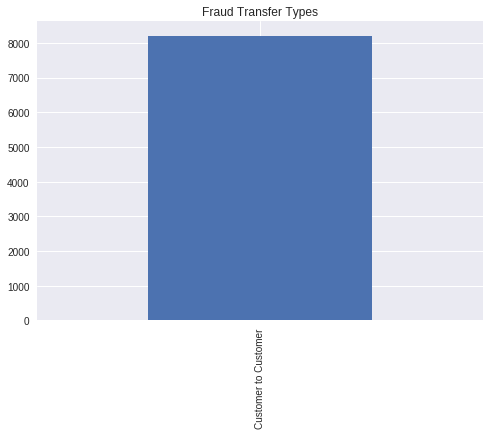

In [0]:
fraudOD.trantype.value_counts().plot(kind = 'bar', title = 'Fraud Transfer Types')

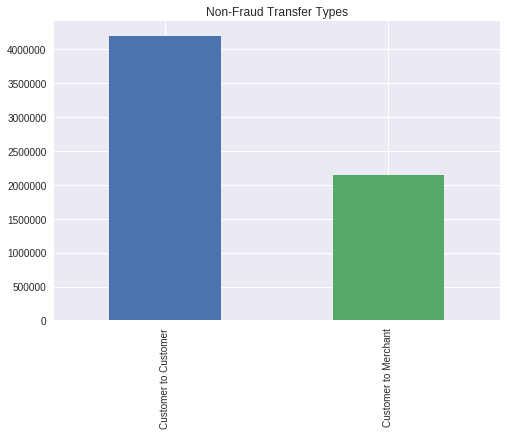

In [0]:
non_fraudOD.trantype.value_counts().plot(kind = 'bar', title = 'Non-Fraud Transfer Types')

In [0]:
Fraud_Data2 = Fraud_data.copy()

In [0]:
#Clean Data and turn to numeric. 
#Removed isFlaggedFraud because it tells if the transaction was fraudulent with an amount over 200K

Fraud_Data2['nameOrig2'] = Fraud_Data2['nameOrig'].astype(str).str[0]
Fraud_Data2['nameDest2'] = Fraud_Data2['nameDest'].astype(str).str[0]


Fraud_Data2['nameOrig3'] = np.where(Fraud_Data2['nameOrig2']=='C', 0, 1)
Fraud_Data2['nameDest3'] = np.where(Fraud_Data2['nameDest2']=='C', 0, 1)


conditions = [
    (Fraud_Data2['type'] == 'PAYMENT'),
    (Fraud_Data2['type'] == 'CASH_OUT'),
    (Fraud_Data2['type'] == 'TRANSFER'),
    (Fraud_Data2['type'] == 'CASH_IN'),
    (Fraud_Data2['type'] == 'DEBIT')]

choices = [0,1,2,3,4]
Fraud_Data2['type2'] = np.select(conditions, choices)

Fraud_Data3 = Fraud_Data2.drop(Fraud_Data2.columns[[1,3,6,10,11,12]], axis = 1)

In [0]:
from scipy import stats
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras import regularizers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


Normalizing data and removing the time feature from the dataset because it was not a useful factor as suspected. This model uses all data.

In [0]:
from sklearn.model_selection import train_test_split
X = Fraud_Data3.drop(Fraud_Data3.columns[[6]], axis = 1)
y = Fraud_Data3[['isFraud']]
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = .2, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5090096, 9) (5090096, 1)
(1272524, 9) (1272524, 1)


In [0]:
#normalizing all data
from sklearn.preprocessing import StandardScaler
Fraud_Data_norm = Fraud_Data3.copy()
#Fraud_Data_norm['step'] = StandardScaler().fit_transform(Fraud_Data_norm['step'].values.reshape(-1, 1))
Fraud_Data_norm['amount'] = StandardScaler().fit_transform(Fraud_Data_norm['amount'].values.reshape(-1, 1))
Fraud_Data_norm['oldbalanceOrg'] = StandardScaler().fit_transform(Fraud_Data_norm['oldbalanceOrg'].values.reshape(-1, 1))
Fraud_Data_norm['newbalanceOrig'] = StandardScaler().fit_transform(Fraud_Data_norm['newbalanceOrig'].values.reshape(-1, 1))
Fraud_Data_norm['oldbalanceDest'] = StandardScaler().fit_transform(Fraud_Data_norm['oldbalanceDest'].values.reshape(-1, 1))
Fraud_Data_norm['newbalanceDest'] = StandardScaler().fit_transform(Fraud_Data_norm['newbalanceDest'].values.reshape(-1, 1))

#Removing time feature
Fraud_Data_norm_notime = Fraud_Data_norm.drop(Fraud_Data_norm.columns[[0]], axis = 1)

from sklearn.model_selection import train_test_split
X = Fraud_Data_norm_notime.drop(Fraud_Data_norm_notime.columns[[5]], axis = 1)
y = Fraud_Data_norm_notime[['isFraud']]
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = .2, 
                                                    random_state = 0)

#Model after normalization and dropping time feature
epochs = 5
batch_size = 256
input_node = X_train.shape[1]
learning_rate = 1e-7

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
#Input layer
model.add(Dense(output_dim = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
#Hidden layers
model.add(Dropout(.5, noise_shape = None, seed = None))
model.add(Dense(output_dim = 15, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dropout(.3, noise_shape = None, seed = None))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 8, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 4, kernel_initializer = 'uniform'))
#Output layer
model.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


history_norm_notime = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
history_norm_notime

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=8, units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=15)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=8)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Dense` call to the Kera

Instructions for updating:
Use tf.cast instead.
Train on 5090096 samples, validate on 1272524 samples
Epoch 1/5
5090096/5090096 [==============================] - 168s 33us/step - loss: 0.0112 - acc: 0.9987 - val_loss: 0.0083 - val_acc: 0.9988
Epoch 2/5
5090096/5090096 [==============================] - 168s 33us/step - loss: 0.0054 - acc: 0.9991 - val_loss: 0.0040 - val_acc: 0.9993
Epoch 3/5
5090096/5090096 [==============================] - 164s 32us/step - loss: 0.0043 - acc: 0.9992 - val_loss: 0.0039 - val_acc: 0.9993
Epoch 4/5
5090096/5090096 [==============================] - 163s 32us/step - loss: 0.0042 - acc: 0.9993 - val_loss: 0.0034 - val_acc: 0.9993
Epoch 5/5
5090096/5090096 [==============================] - 163s 32us/step - loss: 0.0041 - acc: 0.9993 - val_loss: 0.0036 - val_acc: 0.9993


In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm2 = cm[0]
cm3 = cm[1]
TN = cm2[0]
TP = cm3[1]
FN = cm2[1]
FP = cm3[0]

#Create Kappa, Specificity, Sensitivity, Precision, and Recall
Po = (TP + TN)/(TP + FP + FN + TN)
Pyes = ((TP + FP)/(TP + FP + FN + TN)) * ((TP + FN)/(TP + FP + FN + TN))
Pno = ((FN + TN)/(TP + FP + FN + TN)) * ((FP + TN)/(TP + FP + FN + TN))
Pe = Pyes + Pno

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Error_Rate = 1 - Accuracy

Kappa = (Po - Pe)/(1 - Pe)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F_measure = (2*Precision*Recall)/(Recall + Precision)


#Measuring model

print("Accuracy = ""{:.2%}".format(Accuracy))

print("\nError_Rate = ""{:.2%}".format(Error_Rate))

print("\nKappa = " "{:.2%}".format(Kappa))

if np.isnan(Sensitivity) == True:
  print("\nSensitivity = ", 0,"%")
else:
  print("\nSensitivity = ""{:.2%}".format(Sensitivity))
  
if np.isnan(Specificity) == True:
  print("\nSpecificity = ", 0,"%")
else:
  print("\nSpecificity = ""{:.2%}".format(Specificity))
        
if np.isnan(Precision) == True:
  print("\nPrecision = ", 0,"%")
else:
  print("\nPrecision = ""{:.2%}".format(Precision))

if np.isnan(Recall) == True:
  print("\nRecall = ", 0,"%")
else:
  print("\nReall", "{:.2%}".format(Recall))   
  
if np.isnan(F_measure) == True:
  print("\nF_measure = ", 0,"%")
else:
  print("\nF_measure", "{:.2%}".format(F_measure)) 

Accuracy = 99.93%

Error_Rate = 0.07%

Kappa = 63.72%

Sensitivity = 97.01%

Specificity = 99.93%

Precision = 47.47%

Reall 97.01%

F_measure 63.75%


In [0]:
#Creating AUC
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print("AUC score of: \n" "{:.2%}".format(auc_keras))

AUC score of: 
98.38%


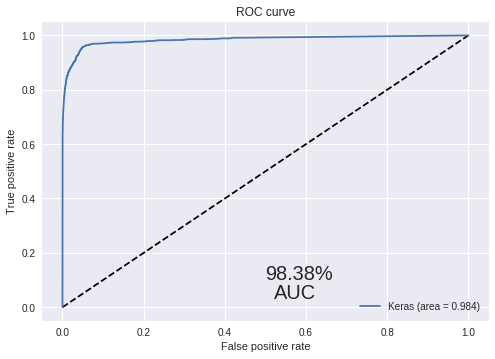

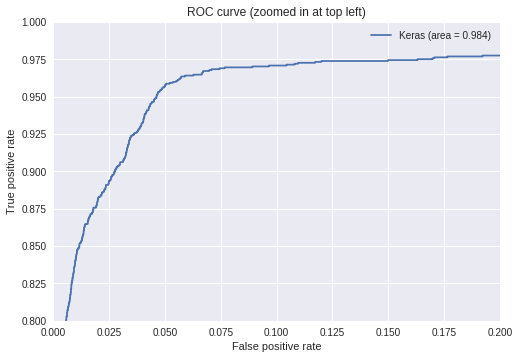

In [0]:
#View of ROC Curve
from pylab import text
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
text(.5,.1,"{:.2%}".format(auc_keras), fontsize=20)
text(.52,.03,"AUC", fontsize=20)
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

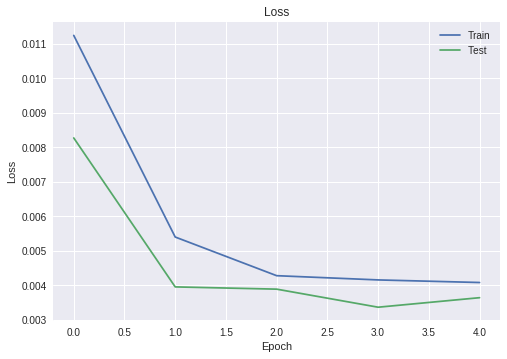

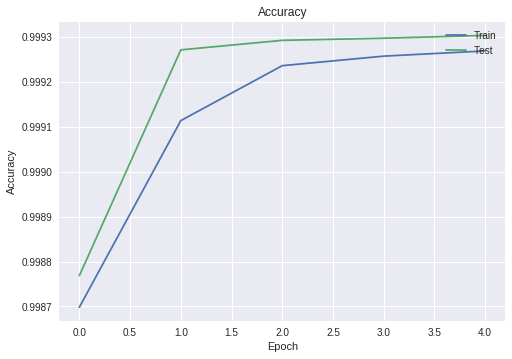

In [0]:
plt.plot(history_norm_notime.history['loss'], label = 'Train')
plt.plot(history_norm_notime.history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

plt.plot(history_norm_notime.history['acc'], label = 'Train')
plt.plot(history_norm_notime.history['val_acc'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()

Results of model using all data:
99.93% accuracy, high accuracy is expected due to the large amounts of non-fraud data.
63.72% kappa, which shows a fairly good agreement in not guessing the data outcome.
98.38 AUC or ROC, shows a high true positive rate or close to perfect classifier.
The loss and accuracy in each epoch do not show any overfitting in the model. 



The next model is using less data to compare better to my support vector machine and decision tree models. Also, want to verify metrics remain the same, if not similar, to the model with all the data given fraud is only .01% of the dataset.

In [0]:
#Downsampling Dataset to test high producing model. Time is included 
from sklearn.model_selection import train_test_split
Fraud_only = Fraud_Data_norm[Fraud_Data_norm["isFraud"]==1]
Non_Fraud_only = Fraud_Data_norm[Fraud_Data_norm["isFraud"]==0]

Non_Fraud_only = Non_Fraud_only.sample(n=50000, random_state = 1)

combineSVMcomp = pd.concat([Fraud_only, Non_Fraud_only])

combineSVMcomp = combineSVMcomp.sample(frac=1)

#Downsample data removing time.
from sklearn.model_selection import train_test_split
combineSVMcomp_notime = combineSVMcomp.drop(combineSVMcomp.columns[[0]], axis = 1)

X = combineSVMcomp_notime.drop(combineSVMcomp_notime.columns[[5]], axis = 1)
y = combineSVMcomp_notime[['isFraud']]
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = .2, 
                                                    random_state = 0)

#Model after downsample to 58k and removing time
epochs = 25
batch_size = 256
input_node = X_train.shape[1]
learning_rate = 1e-7

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
#Input layer
model.add(Dense(output_dim = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
#Hidden layers
model.add(Dropout(.5, noise_shape = None, seed = None))
model.add(Dense(output_dim = 15, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dropout(.3, noise_shape = None, seed = None))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 8, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 4, kernel_initializer = 'uniform'))
#Output layer
model.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


history_DS_notime = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
history_DS_notime

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=8, units=20)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=15)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=8)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Kera

Train on 46570 samples, validate on 11643 samples
Epoch 1/25
46570/46570 [==============================] - 2s 43us/step - loss: 0.4742 - acc: 0.8573 - val_loss: 0.3948 - val_acc: 0.8656
Epoch 2/25
46570/46570 [==============================] - 1s 32us/step - loss: 0.4101 - acc: 0.8572 - val_loss: 0.3957 - val_acc: 0.8656
Epoch 3/25
46570/46570 [==============================] - 2s 32us/step - loss: 0.4101 - acc: 0.8572 - val_loss: 0.3949 - val_acc: 0.8656
Epoch 4/25
46570/46570 [==============================] - 2s 32us/step - loss: 0.4101 - acc: 0.8572 - val_loss: 0.3947 - val_acc: 0.8656
Epoch 5/25
46570/46570 [==============================] - 2s 34us/step - loss: 0.4101 - acc: 0.8572 - val_loss: 0.3954 - val_acc: 0.8656
Epoch 6/25
46570/46570 [==============================] - 2s 32us/step - loss: 0.4100 - acc: 0.8572 - val_loss: 0.3946 - val_acc: 0.8656
Epoch 7/25
46570/46570 [==============================] - 2s 32us/step - loss: 0.4055 - acc: 0.8582 - val_loss: 0.3333 - val_acc

In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm2 = cm[0]
cm3 = cm[1]
TN = cm2[0]
TP = cm3[1]
FN = cm2[1]
FP = cm3[0]

#Create Kappa, Specificity, Sensitivity, Precision, and Recall
Po = (TP + TN)/(TP + FP + FN + TN)
Pyes = ((TP + FP)/(TP + FP + FN + TN)) * ((TP + FN)/(TP + FP + FN + TN))
Pno = ((FN + TN)/(TP + FP + FN + TN)) * ((FP + TN)/(TP + FP + FN + TN))
Pe = Pyes + Pno

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Error_Rate = 1 - Accuracy

Kappa = (Po - Pe)/(1 - Pe)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F_measure = (2*Precision*Recall)/(Recall + Precision)


#Measuring model

print("Accuracy = ""{:.2%}".format(Accuracy))

print("\nError_Rate = ""{:.2%}".format(Error_Rate))

print("\nKappa = " "{:.2%}".format(Kappa))

if np.isnan(Sensitivity) == True:
  print("\nSensitivity = ", 0,"%")
else:
  print("\nSensitivity = ""{:.2%}".format(Sensitivity))
  
if np.isnan(Specificity) == True:
  print("\nSpecificity = ", 0,"%")
else:
  print("\nSpecificity = ""{:.2%}".format(Specificity))
        
if np.isnan(Precision) == True:
  print("\nPrecision = ", 0,"%")
else:
  print("\nPrecision = ""{:.2%}".format(Precision))

if np.isnan(Recall) == True:
  print("\nRecall = ", 0,"%")
else:
  print("\nReall", "{:.2%}".format(Recall))   
  
if np.isnan(F_measure) == True:
  print("\nF_measure = ", 0,"%")
else:
  print("\nF_measure", "{:.2%}".format(F_measure)) 

Accuracy = 97.94%

Error_Rate = 2.06%

Kappa = 90.84%

Sensitivity = 95.91%

Specificity = 98.23%

Precision = 88.43%

Reall 95.91%

F_measure 92.02%


In [0]:
#Creating AUC
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print("AUC score of: \n" "{:.2%}".format(auc_keras))

AUC score of: 
99.30%


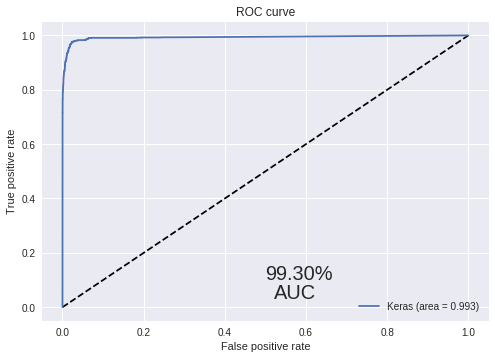

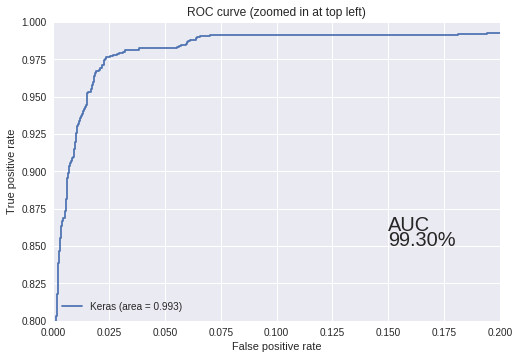

In [0]:
#View of ROC Curve
from pylab import text
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
text(.5,.1,"{:.2%}".format(auc_keras), fontsize=20)
text(.52,.03,"AUC", fontsize=20)
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
text(.15,.85,"{:.2%}".format(auc_keras), fontsize=20)
text(.15,.86,"AUC", fontsize=20)
plt.show()

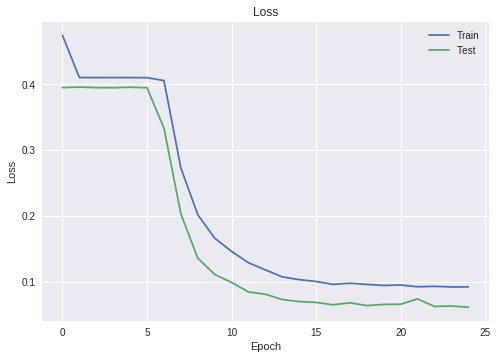

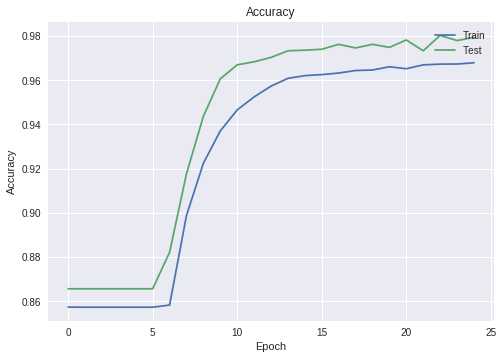

In [0]:
plt.plot(history_DS_notime.history['loss'], label = 'Train')
plt.plot(history_DS_notime.history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

plt.plot(history_DS_notime.history['acc'], label = 'Train')
plt.plot(history_DS_notime.history['val_acc'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()

Results:
99.94% accuracy with a dataset that consist of almost 20% of fraud data.
90.84% kappa which is higher than the model with all data showing guessing is less likely.
99.30% ROC, which tells the model determines the classes strongly and accurately. 
The loss and accuracy between epochs do not show any overfitting.


Appendix: This code consist of other trial models that were out performed by the above models. 

In [0]:
#Model before normalization
from sklearn.metrics import confusion_matrix
from keras import backend as K

epochs = 5
batch_size = 256
input_node = X_train.shape[1]
learning_rate = 1e-7

model = Sequential()

#Input layer
model.add(Dense(output_dim = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
#Hidden layers
model.add(Dropout(.5, noise_shape = None, seed = None))
model.add(Dense(output_dim = 15, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dropout(.3, noise_shape = None, seed = None))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 8, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 4, kernel_initializer = 'uniform'))
#Output layer
model.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


history_non_norm = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
history_non_norm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=9, units=20)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=15)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=8)`
/usr/local/lib/python

Train on 5090096 samples, validate on 1272524 samples
Epoch 1/5
5090096/5090096 [==============================] - 155s 31us/step - loss: 0.0212 - acc: 0.9987 - val_loss: 0.0208 - val_acc: 0.9987
Epoch 2/5
5090096/5090096 [==============================] - 155s 30us/step - loss: 0.0208 - acc: 0.9987 - val_loss: 0.0208 - val_acc: 0.9987
Epoch 3/5
5090096/5090096 [==============================] - 154s 30us/step - loss: 0.0208 - acc: 0.9987 - val_loss: 0.0208 - val_acc: 0.9987
Epoch 4/5
5090096/5090096 [==============================] - 155s 30us/step - loss: 0.0208 - acc: 0.9987 - val_loss: 0.0208 - val_acc: 0.9987
Epoch 5/5
5090096/5090096 [==============================] - 155s 30us/step - loss: 0.0208 - acc: 0.9987 - val_loss: 0.0208 - val_acc: 0.9987


In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm2 = cm[0]
cm3 = cm[1]
TN = cm2[0]
TP = cm3[1]
FN = cm2[1]
FP = cm3[0]

#Check
print(cm, "\nTrue Positive = " ,TP, "\nTrue Negative = ", TN, "\nFalse Positive = " ,FP, "\nFalse Negative = ", FN)

[[1270883       0]
 [   1641       0]] 
True Positive =  0 
True Negative =  1270883 
False Positive =  1641 
False Negative =  0


In [0]:
#Create Kappa, Specificity, Sensitivity, Precision, and Recall
Po = (TP + TN)/(TP + FP + FN + TN)
Pyes = ((TP + FP)/(TP + FP + FN + TN)) * ((TP + FN)/(TP + FP + FN + TN))
Pno = ((FN + TN)/(TP + FP + FN + TN)) * ((FP + TN)/(TP + FP + FN + TN))
Pe = Pyes + Pno

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Error_Rate = 1 - Accuracy

Kappa = (Po - Pe)/(1 - Pe)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F_measure = (2*Precision*Recall)/(Recall + Precision)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


In [0]:
#Measuring model

print("Accuracy = ""{:.2%}".format(Accuracy))

print("\nError_Rate = ""{:.2%}".format(Error_Rate))

print("\nKappa = " "{:.2%}".format(Kappa))

if np.isnan(Sensitivity) == True:
  print("\nSensitivity = ", 0,"%")
else:
  print("\nSensitivity = ""{:.2%}".format(Sensitivity))
  
if np.isnan(Specificity) == True:
  print("\nSpecificity = ", 0,"%")
else:
  print("\nSpecificity = ""{:.2%}".format(Specificity))
        
if np.isnan(Precision) == True:
  print("\nPrecision = ", 0,"%")
else:
  print("\nPrecision = ""{:.2%}".format(Precision))

if np.isnan(Recall) == True:
  print("\nRecall = ", 0,"%")
else:
  print("\nReall", "{:.2%}".format(Recall))   
  
if np.isnan(F_measure) == True:
  print("\nF_measure = ", 0,"%")
else:
  print("\nF_measure", "{:.2%}".format(F_measure)) 

Accuracy = 99.87%

Error_Rate = 0.13%

Kappa = 0.00%

Sensitivity =  0 %

Specificity = 99.87%

Precision = 0.00%

Recall =  0 %

F_measure =  0 %


In [0]:
#Creating AUC Score
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print("AUC score of: \n" "{:.2%}".format(auc_keras))

AUC score of: 
50.00%


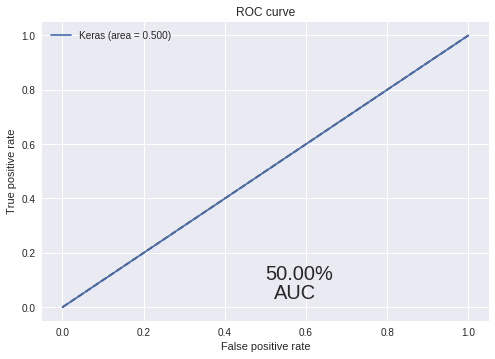

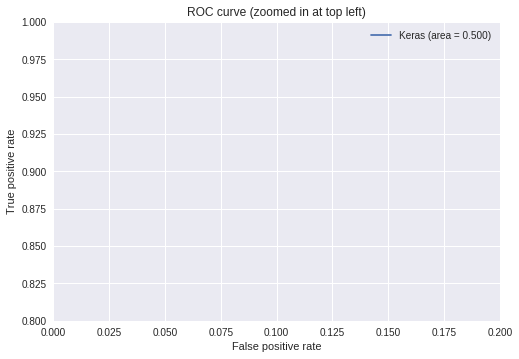

In [0]:
#View of ROC Curve
from pylab import text
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
text(.5,.1,"{:.2%}".format(auc_keras), fontsize=20)
text(.52,.03,"AUC", fontsize=20)
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

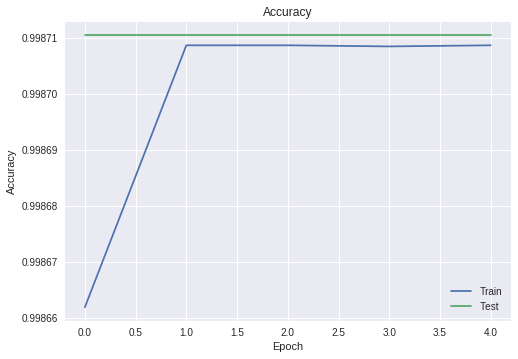

In [0]:
plt.plot(history_non_norm.history['acc'], label = 'Train')
plt.plot(history_non_norm.history['val_acc'], label = 'Test')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()

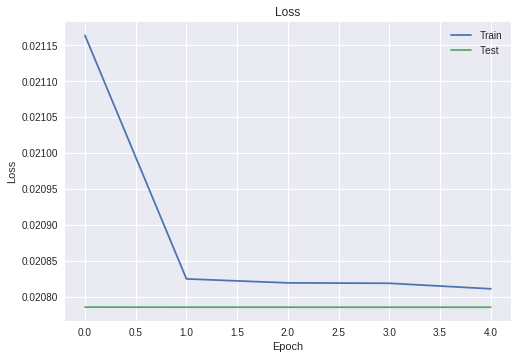

In [0]:
plt.plot(history_non_norm.history['loss'], label = 'Train')
plt.plot(history_non_norm.history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

In [0]:
#Try normalizing all data accept dummy variables, then try without time.
from sklearn.preprocessing import StandardScaler
Fraud_Data_norm = Fraud_Data3.copy()
#Fraud_Data_norm['step'] = StandardScaler().fit_transform(Fraud_Data_norm['step'].values.reshape(-1, 1))
Fraud_Data_norm['amount'] = StandardScaler().fit_transform(Fraud_Data_norm['amount'].values.reshape(-1, 1))
Fraud_Data_norm['oldbalanceOrg'] = StandardScaler().fit_transform(Fraud_Data_norm['oldbalanceOrg'].values.reshape(-1, 1))
Fraud_Data_norm['newbalanceOrig'] = StandardScaler().fit_transform(Fraud_Data_norm['newbalanceOrig'].values.reshape(-1, 1))
Fraud_Data_norm['oldbalanceDest'] = StandardScaler().fit_transform(Fraud_Data_norm['oldbalanceDest'].values.reshape(-1, 1))
Fraud_Data_norm['newbalanceDest'] = StandardScaler().fit_transform(Fraud_Data_norm['newbalanceDest'].values.reshape(-1, 1))

In [0]:
from sklearn.model_selection import train_test_split
X = Fraud_Data_norm.drop(Fraud_Data_norm.columns[[6]], axis = 1)
y = Fraud_Data_norm[['isFraud']]
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = .2, 
                                                    random_state = 0)

In [0]:
#Model after normalization
epochs = 5
batch_size = 256
input_node = X_train.shape[1]
learning_rate = 1e-7

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
#Input layer
model.add(Dense(output_dim = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
#Hidden layers
model.add(Dropout(.5, noise_shape = None, seed = None))
model.add(Dense(output_dim = 15, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dropout(.3, noise_shape = None, seed = None))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 8, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 4, kernel_initializer = 'uniform'))
#Output layer
model.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


history_norm = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
history_norm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=9, units=20)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=15)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=8)`
/usr/local/lib/python

Train on 5090096 samples, validate on 1272524 samples
Epoch 1/5
5090096/5090096 [==============================] - 157s 31us/step - loss: 0.0112 - acc: 0.9987 - val_loss: 0.0093 - val_acc: 0.9987
Epoch 2/5
5090096/5090096 [==============================] - 156s 31us/step - loss: 0.0088 - acc: 0.9987 - val_loss: 0.0079 - val_acc: 0.9989
Epoch 3/5
5090096/5090096 [==============================] - 156s 31us/step - loss: 0.0080 - acc: 0.9988 - val_loss: 0.0069 - val_acc: 0.9990
Epoch 4/5
5090096/5090096 [==============================] - 156s 31us/step - loss: 0.0076 - acc: 0.9989 - val_loss: 0.0064 - val_acc: 0.9990
Epoch 5/5
5090096/5090096 [==============================] - 156s 31us/step - loss: 0.0073 - acc: 0.9989 - val_loss: 0.0064 - val_acc: 0.9990


In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm2 = cm[0]
cm3 = cm[1]
TN = cm2[0]
TP = cm3[1]
FN = cm2[1]
FP = cm3[0]

#Create Kappa, Specificity, Sensitivity, Precision, and Recall
Po = (TP + TN)/(TP + FP + FN + TN)
Pyes = ((TP + FP)/(TP + FP + FN + TN)) * ((TP + FN)/(TP + FP + FN + TN))
Pno = ((FN + TN)/(TP + FP + FN + TN)) * ((FP + TN)/(TP + FP + FN + TN))
Pe = Pyes + Pno

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Error_Rate = 1 - Accuracy

Kappa = (Po - Pe)/(1 - Pe)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F_measure = (2*Precision*Recall)/(Recall + Precision)


#Measuring model

print("Accuracy = ""{:.2%}".format(Accuracy))

print("\nError_Rate = ""{:.2%}".format(Error_Rate))

print("\nKappa = " "{:.2%}".format(Kappa))

if np.isnan(Sensitivity) == True:
  print("\nSensitivity = ", 0,"%")
else:
  print("\nSensitivity = ""{:.2%}".format(Sensitivity))
  
if np.isnan(Specificity) == True:
  print("\nSpecificity = ", 0,"%")
else:
  print("\nSpecificity = ""{:.2%}".format(Specificity))
        
if np.isnan(Precision) == True:
  print("\nPrecision = ", 0,"%")
else:
  print("\nPrecision = ""{:.2%}".format(Precision))

if np.isnan(Recall) == True:
  print("\nRecall = ", 0,"%")
else:
  print("\nReall", "{:.2%}".format(Recall))   
  
if np.isnan(F_measure) == True:
  print("\nF_measure = ", 0,"%")
else:
  print("\nF_measure", "{:.2%}".format(F_measure)) 

Accuracy = 99.90%

Error_Rate = 0.10%

Kappa = 38.48%

Sensitivity = 99.24%

Specificity = 99.90%

Precision = 23.89%

Reall 99.24%

F_measure 38.51%


In [0]:
#Creating AUC
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print("AUC score of: \n" "{:.2%}".format(auc_keras))

AUC score of: 
91.35%


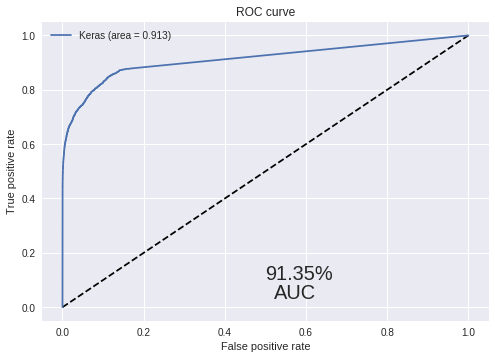

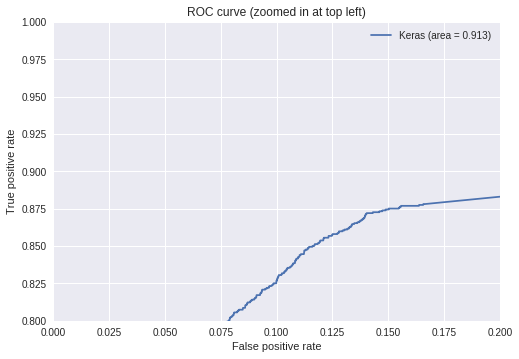

In [0]:
#View of ROC Curve
from pylab import text
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
text(.5,.1,"{:.2%}".format(auc_keras), fontsize=20)
text(.52,.03,"AUC", fontsize=20)
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

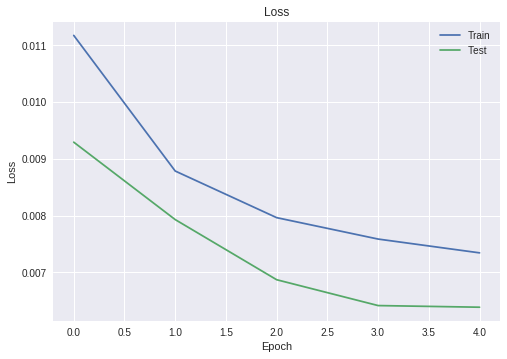

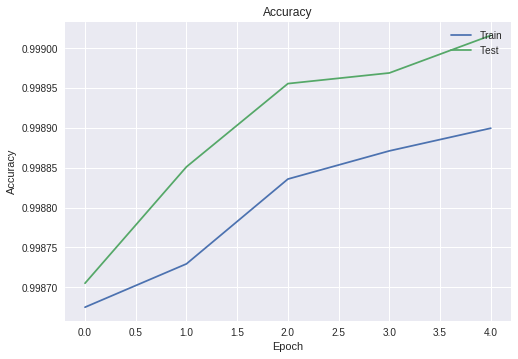

In [0]:
plt.plot(history_norm.history['loss'], label = 'Train')
plt.plot(history_norm.history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

plt.plot(history_norm.history['acc'], label = 'Train')
plt.plot(history_norm.history['val_acc'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()

Next model is the normalization without time but attempting to tune the model to increase performance. Could not make model perform better.

In [0]:
#Model after normalization and dropping time feature: TUNING
epochs = 15
batch_size = 128
input_node = X_train.shape[1]
learning_rate = 1e-7

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
#Input layer
model.add(Dense(output_dim = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
#Hidden layers
model.add(Dropout(.6, noise_shape = None, seed = None))
model.add(Dense(output_dim = 15, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dropout(.3, noise_shape = None, seed = None))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 4, kernel_initializer = 'uniform'))
model.add(Dropout(.1, noise_shape = None, seed = None))
#Output layer
model.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


history_norm_all_tune = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
history_norm_all_tune

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=8, units=20)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=15)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=4)`
/usr/local/lib/python

Train on 5090096 samples, validate on 1272524 samples
Epoch 1/15
5090096/5090096 [==============================] - 302s 59us/step - loss: 0.0081 - acc: 0.9990 - val_loss: 0.0055 - val_acc: 0.9992
Epoch 2/15
5090096/5090096 [==============================] - 298s 58us/step - loss: 0.0056 - acc: 0.9992 - val_loss: 0.0050 - val_acc: 0.9992
Epoch 3/15
5090096/5090096 [==============================] - 298s 59us/step - loss: 0.0054 - acc: 0.9992 - val_loss: 0.0041 - val_acc: 0.9993
Epoch 4/15
5090096/5090096 [==============================] - 297s 58us/step - loss: 0.0053 - acc: 0.9992 - val_loss: 0.0040 - val_acc: 0.9993
Epoch 5/15
5090096/5090096 [==============================] - 297s 58us/step - loss: 0.0053 - acc: 0.9992 - val_loss: 0.0044 - val_acc: 0.9992
Epoch 6/15
5090096/5090096 [==============================] - 298s 58us/step - loss: 0.0052 - acc: 0.9992 - val_loss: 0.0052 - val_acc: 0.9992
Epoch 7/15
5090096/5090096 [==============================] - 297s 58us/step - loss: 0.0

In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm2 = cm[0]
cm3 = cm[1]
TN = cm2[0]
TP = cm3[1]
FN = cm2[1]
FP = cm3[0]

#Create Kappa, Specificity, Sensitivity, Precision, and Recall
Po = (TP + TN)/(TP + FP + FN + TN)
Pyes = ((TP + FP)/(TP + FP + FN + TN)) * ((TP + FN)/(TP + FP + FN + TN))
Pno = ((FN + TN)/(TP + FP + FN + TN)) * ((FP + TN)/(TP + FP + FN + TN))
Pe = Pyes + Pno

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Error_Rate = 1 - Accuracy

Kappa = (Po - Pe)/(1 - Pe)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F_measure = (2*Precision*Recall)/(Recall + Precision)


#Measuring model

print("Accuracy = ""{:.2%}".format(Accuracy))

print("\nError_Rate = ""{:.2%}".format(Error_Rate))

print("\nKappa = " "{:.2%}".format(Kappa))

if np.isnan(Sensitivity) == True:
  print("\nSensitivity = ", 0,"%")
else:
  print("\nSensitivity = ""{:.2%}".format(Sensitivity))
  
if np.isnan(Specificity) == True:
  print("\nSpecificity = ", 0,"%")
else:
  print("\nSpecificity = ""{:.2%}".format(Specificity))
        
if np.isnan(Precision) == True:
  print("\nPrecision = ", 0,"%")
else:
  print("\nPrecision = ""{:.2%}".format(Precision))

if np.isnan(Recall) == True:
  print("\nRecall = ", 0,"%")
else:
  print("\nReall", "{:.2%}".format(Recall))   
  
if np.isnan(F_measure) == True:
  print("\nF_measure = ", 0,"%")
else:
  print("\nF_measure", "{:.2%}".format(F_measure)) 

Accuracy = 99.93%

Error_Rate = 0.07%

Kappa = 62.02%

Sensitivity = 98.28%

Specificity = 99.93%

Precision = 45.34%

Reall 98.28%

F_measure 62.05%


In [0]:
#Creating AUC
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print("AUC score of: \n" "{:.2%}".format(auc_keras))

AUC score of: 
96.40%


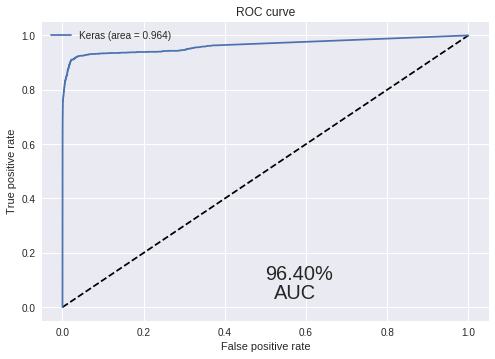

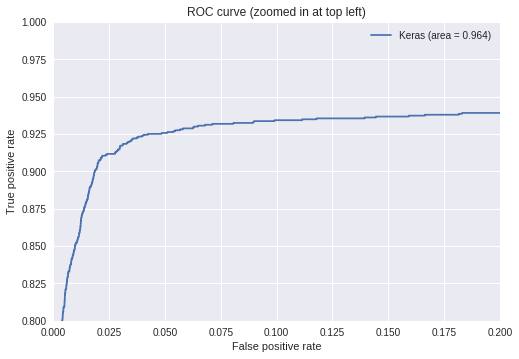

In [0]:
#View of ROC Curve
from pylab import text
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
text(.5,.1,"{:.2%}".format(auc_keras), fontsize=20)
text(.52,.03,"AUC", fontsize=20)
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

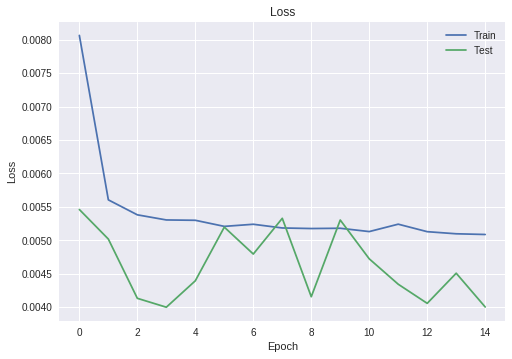

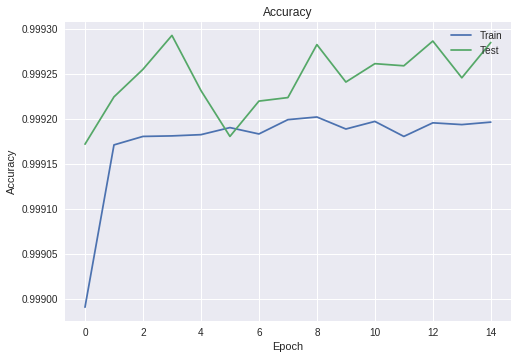

In [0]:
plt.plot(history_norm_all_tune.history['loss'], label = 'Train')
plt.plot(history_norm_all_tune.history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

plt.plot(history_norm_all_tune.history['acc'], label = 'Train')
plt.plot(history_norm_all_tune.history['val_acc'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()

Tuning of hyperparameters and changing model set up did not increase model accuracy. 

In [0]:
#Downsampling Dataset to test high producing model. Time is included 
from sklearn.model_selection import train_test_split
Fraud_only = Fraud_Data_norm[Fraud_Data_norm["isFraud"]==1]
Non_Fraud_only = Fraud_Data_norm[Fraud_Data_norm["isFraud"]==0]

Non_Fraud_only = Non_Fraud_only.sample(n=50000, random_state = 1)

combineSVMcomp = pd.concat([Fraud_only, Non_Fraud_only])

combineSVMcomp = combineSVMcomp.sample(frac=1)

In [0]:
from sklearn.model_selection import train_test_split
X = combineSVMcomp.drop(combineSVMcomp.columns[[6]], axis = 1)
y = combineSVMcomp[['isFraud']]
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = .2, 
                                                    random_state = 0)

In [0]:
#Model after downsample to 58k
epochs = 25
batch_size = 256
input_node = X_train.shape[1]
learning_rate = 1e-7

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
#Input layer
model.add(Dense(output_dim = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
#Hidden layers
model.add(Dropout(.5, noise_shape = None, seed = None))
model.add(Dense(output_dim = 15, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dropout(.3, noise_shape = None, seed = None))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 8, kernel_initializer = 'uniform'))
model.add(Dense(output_dim = 4, kernel_initializer = 'uniform'))
#Output layer
model.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


history_DS = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
history_DS

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=9, units=20)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=15)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=8)`
/usr/local/lib/python

Train on 46570 samples, validate on 11643 samples
Epoch 1/25
46570/46570 [==============================] - 3s 54us/step - loss: 0.4685 - acc: 0.8581 - val_loss: 0.4311 - val_acc: 0.8643
Epoch 2/25
46570/46570 [==============================] - 1s 31us/step - loss: 0.3884 - acc: 0.8596 - val_loss: 0.3810 - val_acc: 0.8585
Epoch 3/25
46570/46570 [==============================] - 1s 31us/step - loss: 0.3853 - acc: 0.8601 - val_loss: 0.3688 - val_acc: 0.8598
Epoch 4/25
46570/46570 [==============================] - 1s 31us/step - loss: 0.3785 - acc: 0.8617 - val_loss: 0.3625 - val_acc: 0.8647
Epoch 5/25
46570/46570 [==============================] - 1s 31us/step - loss: 0.3633 - acc: 0.8697 - val_loss: 0.3349 - val_acc: 0.8750
Epoch 6/25
46570/46570 [==============================] - 1s 31us/step - loss: 0.3452 - acc: 0.8766 - val_loss: 0.3587 - val_acc: 0.8758
Epoch 7/25
46570/46570 [==============================] - 1s 30us/step - loss: 0.3367 - acc: 0.8796 - val_loss: 0.3052 - val_acc

In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm2 = cm[0]
cm3 = cm[1]
TN = cm2[0]
TP = cm3[1]
FN = cm2[1]
FP = cm3[0]

#Create Kappa, Specificity, Sensitivity, Precision, and Recall
Po = (TP + TN)/(TP + FP + FN + TN)
Pyes = ((TP + FP)/(TP + FP + FN + TN)) * ((TP + FN)/(TP + FP + FN + TN))
Pno = ((FN + TN)/(TP + FP + FN + TN)) * ((FP + TN)/(TP + FP + FN + TN))
Pe = Pyes + Pno

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Error_Rate = 1 - Accuracy

Kappa = (Po - Pe)/(1 - Pe)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F_measure = (2*Precision*Recall)/(Recall + Precision)


#Measuring model

print("Accuracy = ""{:.2%}".format(Accuracy))

print("\nError_Rate = ""{:.2%}".format(Error_Rate))

print("\nKappa = " "{:.2%}".format(Kappa))

if np.isnan(Sensitivity) == True:
  print("\nSensitivity = ", 0,"%")
else:
  print("\nSensitivity = ""{:.2%}".format(Sensitivity))
  
if np.isnan(Specificity) == True:
  print("\nSpecificity = ", 0,"%")
else:
  print("\nSpecificity = ""{:.2%}".format(Specificity))
        
if np.isnan(Precision) == True:
  print("\nPrecision = ", 0,"%")
else:
  print("\nPrecision = ""{:.2%}".format(Precision))

if np.isnan(Recall) == True:
  print("\nRecall = ", 0,"%")
else:
  print("\nReall", "{:.2%}".format(Recall))   
  
if np.isnan(F_measure) == True:
  print("\nF_measure = ", 0,"%")
else:
  print("\nF_measure", "{:.2%}".format(F_measure)) 

Accuracy = 90.66%

Error_Rate = 9.34%

Kappa = 47.42%

Sensitivity = 97.45%

Specificity = 90.29%

Precision = 34.85%

Reall 97.45%

F_measure 51.34%


In [0]:
#Creating AUC
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print("AUC score of: \n" "{:.2%}".format(auc_keras))

AUC score of: 
93.65%


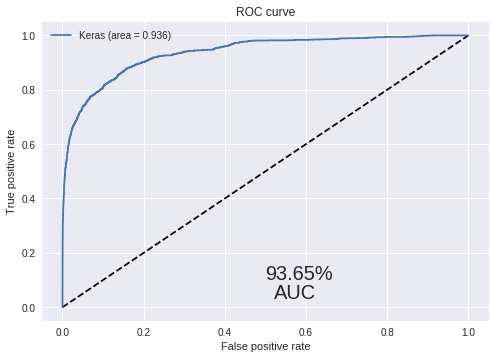

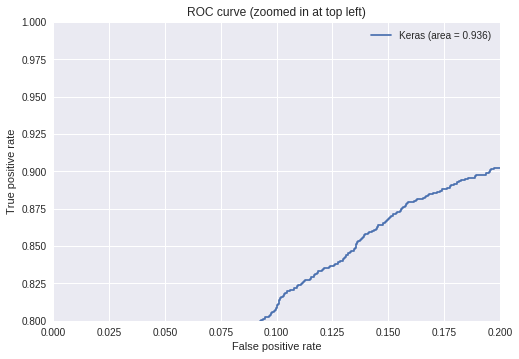

In [0]:
#View of ROC Curve
from pylab import text
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
text(.5,.1,"{:.2%}".format(auc_keras), fontsize=20)
text(.52,.03,"AUC", fontsize=20)
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

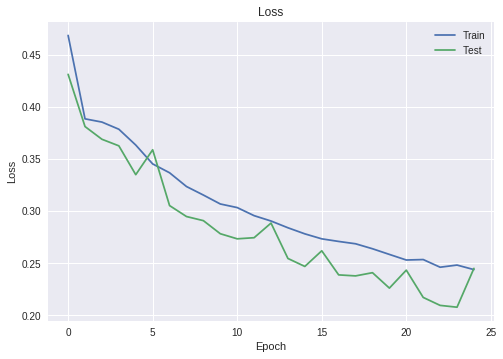

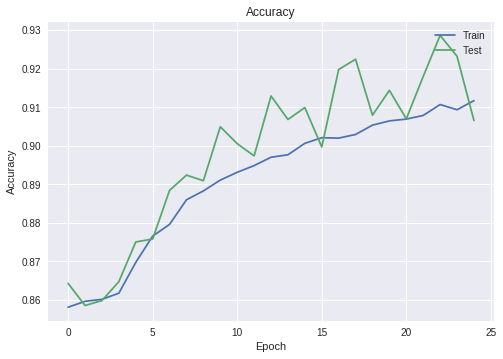

In [0]:
plt.plot(history_DS.history['loss'], label = 'Train')
plt.plot(history_DS.history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

plt.plot(history_DS.history['acc'], label = 'Train')
plt.plot(history_DS.history['val_acc'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()

Best model for downsampling data, but the model appears to be overfitting.

In [0]:
#Tuning downsample w/no time model
epochs = 20
batch_size = 128
input_node = X_train.shape[1]
learning_rate = 1e-7

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
#Input layer
model.add(Dense(output_dim = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
#Hidden layers
model.add(Dense(output_dim = 15, kernel_initializer = 'uniform'))
model.add(Dropout(.4, noise_shape = None, seed = None))
model.add(Dense(output_dim = 10, kernel_initializer = 'uniform'))
model.add(Dropout(.2, noise_shape = None, seed = None))
model.add(Dense(output_dim = 5, kernel_initializer = 'uniform'))
#Output layer
model.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


history_DS_tune = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
history_DS_tune

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=8, units=20)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=15)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=5)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=1)`


Train on 46570 samples, validate on 11643 samples
Epoch 1/20
46570/46570 [==============================] - 4s 92us/step - loss: 0.3138 - acc: 0.8963 - val_loss: 0.1635 - val_acc: 0.9460
Epoch 2/20
46570/46570 [==============================] - 3s 54us/step - loss: 0.1431 - acc: 0.9486 - val_loss: 0.1230 - val_acc: 0.9598
Epoch 3/20
46570/46570 [==============================] - 3s 54us/step - loss: 0.1142 - acc: 0.9581 - val_loss: 0.0955 - val_acc: 0.9600
Epoch 4/20
46570/46570 [==============================] - 3s 54us/step - loss: 0.0966 - acc: 0.9627 - val_loss: 0.0900 - val_acc: 0.9644
Epoch 5/20
46570/46570 [==============================] - 3s 54us/step - loss: 0.0848 - acc: 0.9672 - val_loss: 0.0785 - val_acc: 0.9683
Epoch 6/20
46570/46570 [==============================] - 3s 54us/step - loss: 0.0781 - acc: 0.9693 - val_loss: 0.0719 - val_acc: 0.9720
Epoch 7/20
46570/46570 [==============================] - 2s 53us/step - loss: 0.0708 - acc: 0.9711 - val_loss: 0.0720 - val_acc

In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm2 = cm[0]
cm3 = cm[1]
TN = cm2[0]
TP = cm3[1]
FN = cm2[1]
FP = cm3[0]

#Create Kappa, Specificity, Sensitivity, Precision, and Recall
Po = (TP + TN)/(TP + FP + FN + TN)
Pyes = ((TP + FP)/(TP + FP + FN + TN)) * ((TP + FN)/(TP + FP + FN + TN))
Pno = ((FN + TN)/(TP + FP + FN + TN)) * ((FP + TN)/(TP + FP + FN + TN))
Pe = Pyes + Pno

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Error_Rate = 1 - Accuracy

Kappa = (Po - Pe)/(1 - Pe)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F_measure = (2*Precision*Recall)/(Recall + Precision)


#Measuring model

print("Accuracy = ""{:.2%}".format(Accuracy))

print("\nError_Rate = ""{:.2%}".format(Error_Rate))

print("\nKappa = " "{:.2%}".format(Kappa))

if np.isnan(Sensitivity) == True:
  print("\nSensitivity = ", 0,"%")
else:
  print("\nSensitivity = ""{:.2%}".format(Sensitivity))
  
if np.isnan(Specificity) == True:
  print("\nSpecificity = ", 0,"%")
else:
  print("\nSpecificity = ""{:.2%}".format(Specificity))
        
if np.isnan(Precision) == True:
  print("\nPrecision = ", 0,"%")
else:
  print("\nPrecision = ""{:.2%}".format(Precision))

if np.isnan(Recall) == True:
  print("\nRecall = ", 0,"%")
else:
  print("\nReall", "{:.2%}".format(Recall))   
  
if np.isnan(F_measure) == True:
  print("\nF_measure = ", 0,"%")
else:
  print("\nF_measure", "{:.2%}".format(F_measure)) 

Accuracy = 97.82%

Error_Rate = 2.18%

Kappa = 90.59%

Sensitivity = 97.41%

Specificity = 97.88%

Precision = 86.89%

Reall 97.41%

F_measure 91.85%


In [0]:
#Creating AUC
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print("AUC score of: \n" "{:.2%}".format(auc_keras))

AUC score of: 
99.59%


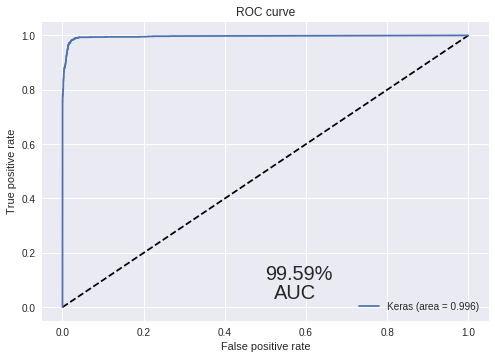

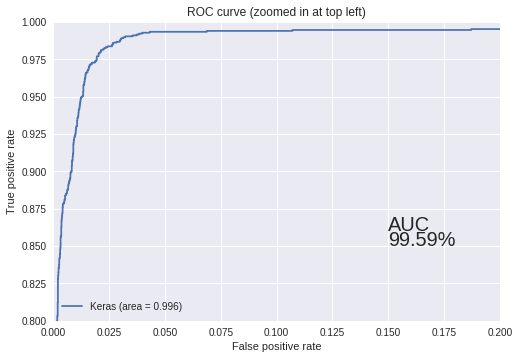

In [0]:
#View of ROC Curve
from pylab import text
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
text(.5,.1,"{:.2%}".format(auc_keras), fontsize=20)
text(.52,.03,"AUC", fontsize=20)
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
text(.15,.85,"{:.2%}".format(auc_keras), fontsize=20)
text(.15,.86,"AUC", fontsize=20)
plt.show()

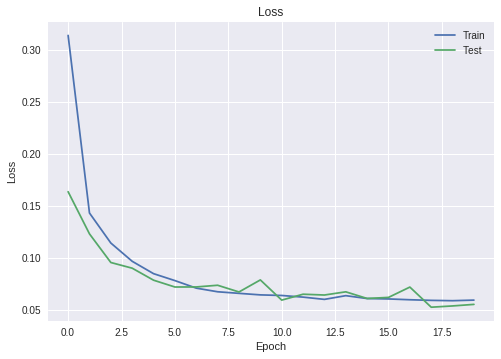

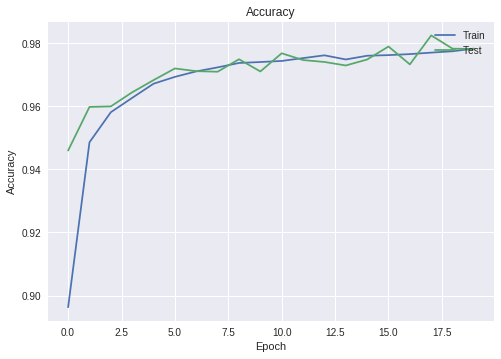

In [0]:
plt.plot(history_DS_tune.history['loss'], label = 'Train')
plt.plot(history_DS_tune.history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

plt.plot(history_DS_tune.history['acc'], label = 'Train')
plt.plot(history_DS_tune.history['val_acc'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()

Model is possibly overfitting.